In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df_dt = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")

# Create label column
df_dt['healthy'] = (df_dt['calories'] < 120).astype(int)

# Select features and target
X = df_dt[['calories', 'protein', 'fat']]
y = df_dt['healthy']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training 3 DTs

In [3]:
dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)
dt2.fit(X_train, y_train)

dt3 = DecisionTreeClassifier(criterion='gini', min_samples_split=20, random_state=3)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=3)

In [4]:
dt1_preds = dt1.predict(X_test)
dt2_preds = dt2.predict(X_test)
dt3_preds = dt3.predict(X_test)

In [5]:
acc1 = accuracy_score(y_test, dt1_preds)
acc2 = accuracy_score(y_test, dt2_preds)
acc3 = accuracy_score(y_test, dt3_preds)

cm1 = confusion_matrix(y_test, dt1_preds)
cm2 = confusion_matrix(y_test, dt2_preds)
cm3 = confusion_matrix(y_test, dt3_preds)

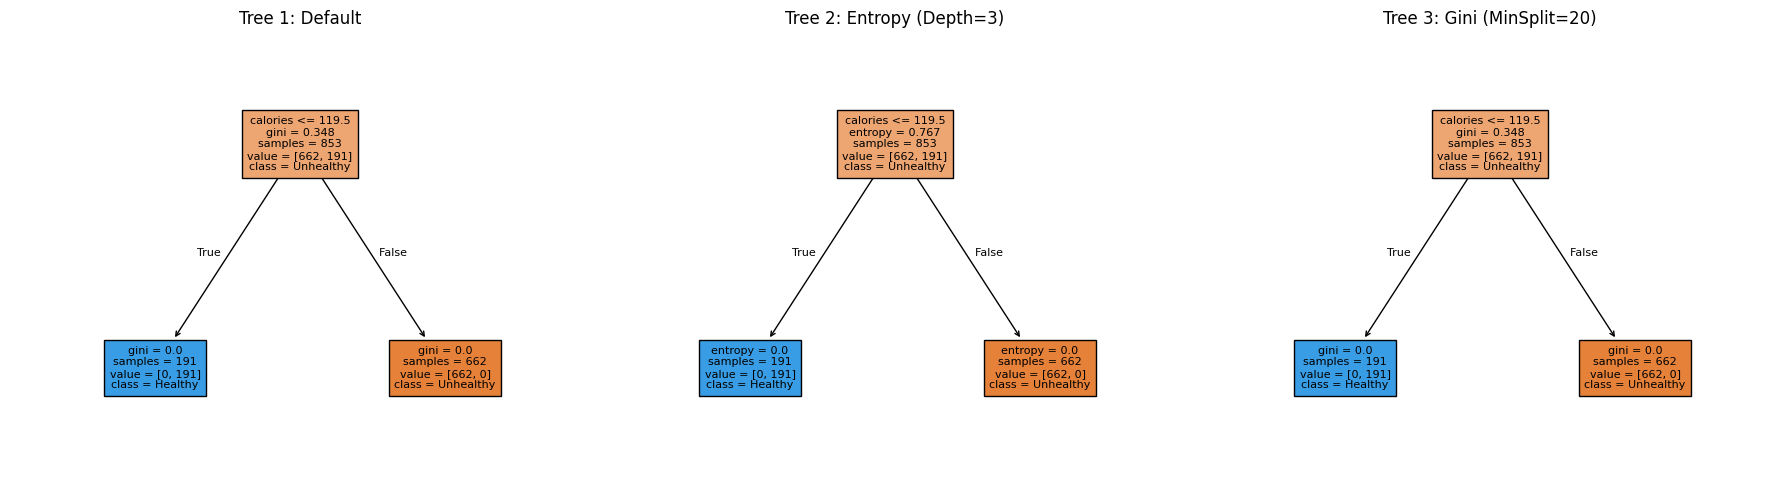

(1.0, 1.0, 1.0)

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Tree 1: Default', 'Tree 2: Entropy (Depth=3)', 'Tree 3: Gini (MinSplit=20)']
trees = [dt1, dt2, dt3]

for i, tree in enumerate(trees):
    plot_tree(tree, feature_names=X.columns, class_names=['Unhealthy', 'Healthy'],
              filled=True, ax=axs[i], fontsize=8)
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()

(acc1, acc2, acc3)